In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('citrus.csv')

In [4]:
df = pd.DataFrame(data)

df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


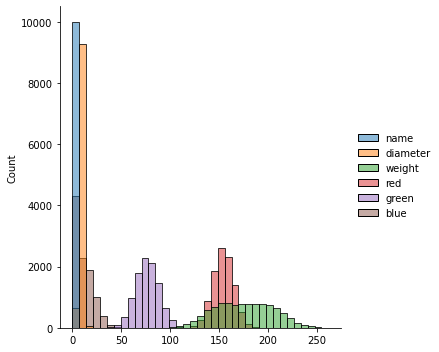

In [22]:
import seaborn as sns
sns.displot(df)

In [5]:
df.shape

(10000, 6)

In [6]:
#df.name.value_counts()

df['name']=df['name'].map({'orange':0,'grapefruit':1})

#df.isnull().sum()

In [7]:
df.name.value_counts()

0    5000
1    5000
Name: name, dtype: int64

In [8]:
df.corr()

,name,diameter,weight,red,green,blue
name,1.000000,0.770768,0.761567,-0.286127,-0.510564,0.468832
diameter,0.770768,1.000000,0.999476,-0.217821,-0.396832,0.363307
weight,0.761567,0.999476,1.000000,-0.214714,-0.392003,0.358916
red,-0.286127,-0.217821,-0.214714,1.000000,0.148937,-0.135900
green,-0.510564,-0.396832,-0.392003,0.148937,1.000000,-0.242495
blue,0.468832,0.363307,0.358916,-0.135900,-0.242495,1.000000


In [9]:
# Weight & diameter has very strong co-relation. We can drop one of them.

##### Dropping diameter gives score 0.91 and without dropping score is 0.96 ..... STRANGE

#df=df.drop(['diameter'],axis=1)

df.head()

,name,diameter,weight,red,green,blue
0,0,2.96,86.76,172,85,2
1,0,3.91,88.05,166,78,3
2,0,4.42,95.17,156,81,2
3,0,4.47,95.60,163,81,4
4,0,4.48,95.76,161,72,9


In [10]:
X=df.drop(['name'],axis=1)
y=df.name

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=25)

In [13]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

In [14]:
from sklearn.model_selection import GridSearchCV
parameters={'penalty':['l1','l2','elasticnet'],'C':[0.1,0.5,1,2,3,4,5,6,10,20,30,40,50,100,200,300],'max_iter':[50,100,150,200,250,300]}

classifier_regressor = GridSearchCV(classifier,param_grid=parameters,scoring='accuracy',cv=5)

In [16]:
classifier_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50,
                               100, 200, 300],
                         'max_iter': [50, 100, 150, 200, 250, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [17]:
classifier_regressor.best_params_

{'C': 300, 'max_iter': 50, 'penalty': 'l2'}

In [18]:
classifier_regressor.best_score_

0.9601333333333335

In [20]:
y_pred = classifier_regressor.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1237
           1       0.96      0.98      0.97      1263

    accuracy                           0.97      2500
   macro avg       0.97      0.97      0.97      2500
weighted avg       0.97      0.97      0.97      2500



In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1237
           1       0.96      0.98      0.97      1263

    accuracy                           0.97      2500
   macro avg       0.97      0.97      0.97      2500
weighted avg       0.97      0.97      0.97      2500

